# 파이썬 머신러닝 판다스 데이터분석 CH07
<b>작성일자 :</b> 2021-05-31<br>
<b>작성자 :</b> 이예희<br>
<b>내용 :</b> 파이썬 머신러닝 판다스 데이터분석 챕터 7<br>
<hr>

In [2]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./auto-mpg.csv", header = None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [8]:
df.info()
# r에서의 str과 같음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.head()
# r에서는 6개

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
pd.set_option('display.max_columns', 10)
# ipynb에서만 먹히는 것. 파이참 등에서는 안먹힘
# 컬럼 10개까지만 보여주는것.

print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  




In [15]:
df.describe()
# median과 mean과 차이가 크지 않은게 좋음
# standart diviation?

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
df['horsepower'].unique()
# horsepower의 고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [25]:
df["horsepower"].replace("?", np.nan, inplace = True)

In [26]:
df.dropna(subset = ["horsepower"], axis = 0, inplace = True)

In [28]:
df["horsepower"].head() # 마력

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: object

In [30]:
df["horsepower"] = df["horsepower"].astype("float")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [34]:
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


<AxesSubplot:xlabel='weight', ylabel='mpg'>

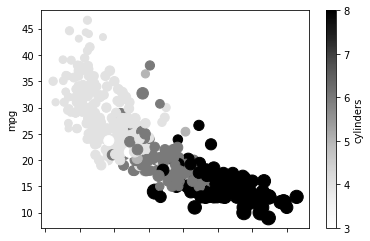

In [42]:
ndf.plot(kind = "scatter", x = "weight", y = "mpg", c = "cylinders", s = "horsepower", figsize = (6, 4))
# c : color, s : size

<AxesSubplot:xlabel='weight', ylabel='mpg'>

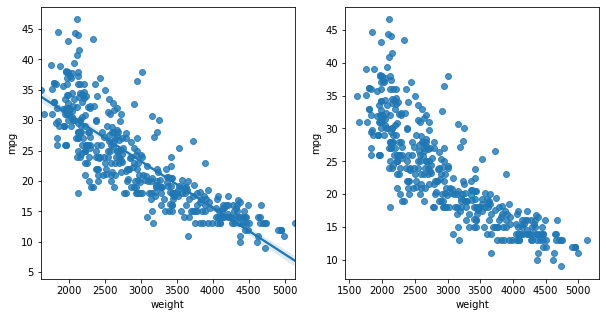

In [39]:
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)  # 1행 2열 첫번째
ax2 = fig.add_subplot(1, 2, 2)  # 1행 2열 두번째
sns.regplot(x = "weight", y = "mpg", data = ndf, ax = ax1)
sns.regplot(x = "weight", y = "mpg", data = ndf, ax = ax2, fit_reg = False)

<function matplotlib.pyplot.show(close=None, block=None)>

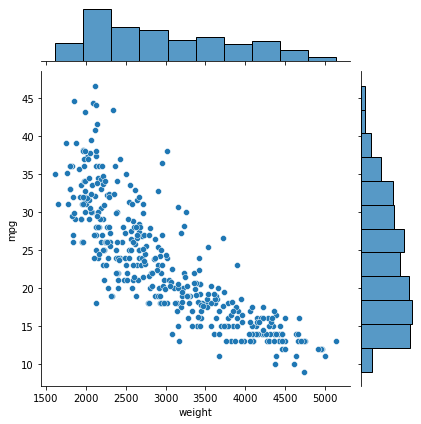

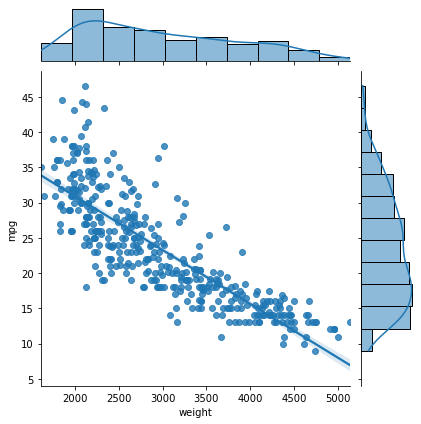

In [43]:
sns.jointplot(x = "weight", y = "mpg", data = ndf)
sns.jointplot(x = "weight", y = "mpg", kind = "reg", data = ndf)
plt.show()

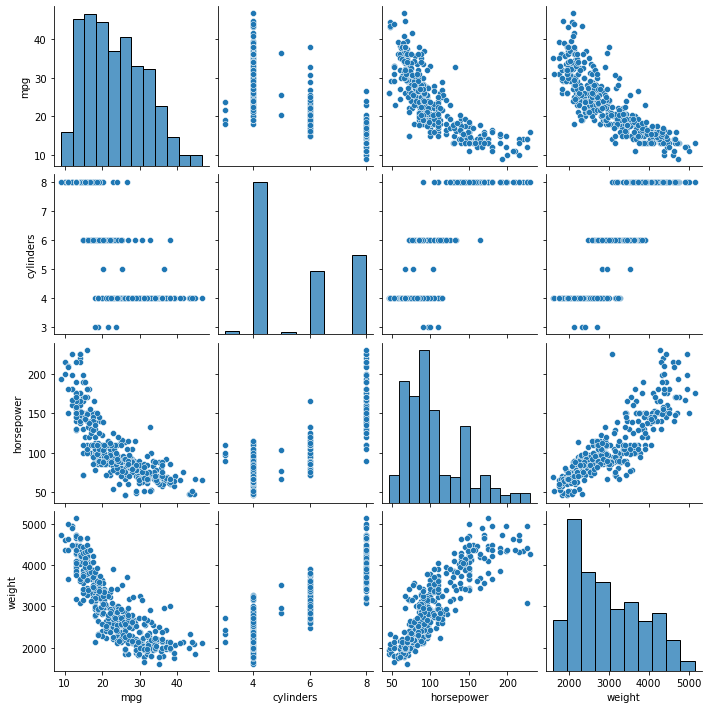

In [45]:
# 탐색적 데이터 분석. EDA
sns.pairplot(ndf)

In [46]:
X = ndf[["weight"]]
y = ndf[["mpg"]]

In [48]:
# data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
# test 0.3. 즉, train은 0.7로 하겠단것
# 랜덤으로 섞음

In [49]:
len(X_train)

274

In [50]:
len(X_test)

118

In [54]:
from sklearn.linear_model import LinearRegression
# 모형 학습. fit()
# 반드시 트레인데이터로 해야함
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
# 모형 평가
# 테스트 데이터로 해야함
r_square = lr.score(X_test, y_test)
# r_square : 결정 계수. R^2

In [58]:
r_square

0.6822458558299325

In [59]:
# coefficient. 상관계수
lr.coef_

array([[-0.00775343]])

In [60]:
# y 절편?
lr.intercept_

array([46.71036626])

In [64]:
# 예측
y_hat = lr.predict(X)
y_hat

array([[19.54234168],
       [18.0769431 ],
       [20.06957503],
       [20.09283533],
       [19.96878042],
       [13.05271937],
       [12.95192476],
       [13.27756889],
       [12.40143111],
       [16.85965432],
       [19.08488921],
       [18.72823136],
       [17.54970974],
       [22.78327612],
       [28.31922633],
       [24.74489433],
       [25.2023468 ],
       [26.65223852],
       [30.1955568 ],
       [32.48281914],
       [25.99319683],
       [27.8695273 ],
       [28.29596604],
       [29.3891999 ],
       [26.17927919],
       [10.92827909],
       [12.78134926],
       [12.73482867],
       [10.02112759],
       [30.1955568 ],
       [29.15659695],
       [29.43572049],
       [26.28782724],
       [20.04631474],
       [20.89919222],
       [21.10853488],
       [21.21708292],
       [14.07617235],
       [12.09904728],
       [14.50261109],
       [14.95231013],
       [ 8.29211233],
       [ 9.91257955],
       [ 6.85772747],
       [23.74470165],
       [28

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


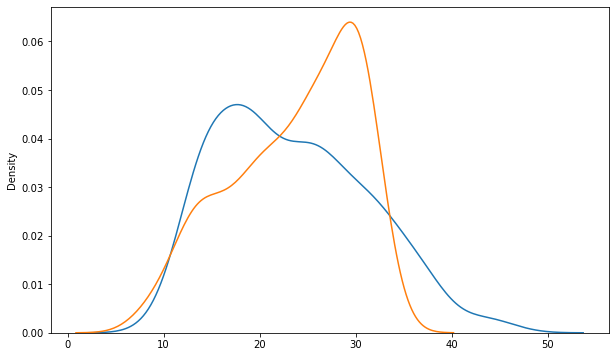

In [65]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(y, hist = False, label = "y")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식 변환

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

In [72]:
print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [73]:
# train 학습
# test 평가, 검증

# 1. 트레인 데이터로 학습
plr = LinearRegression()
plr.fit(X_train_poly, y_train)
# 다항인 X_train을 집어넣음

LinearRegression()

In [76]:
X_test_poly = poly.fit_transform(X_test)
r_square = plr.score(X_test_poly, y_test)
r_square

0.7087009262975481

In [78]:
y_hat_test = plr.predict(X_test_poly)

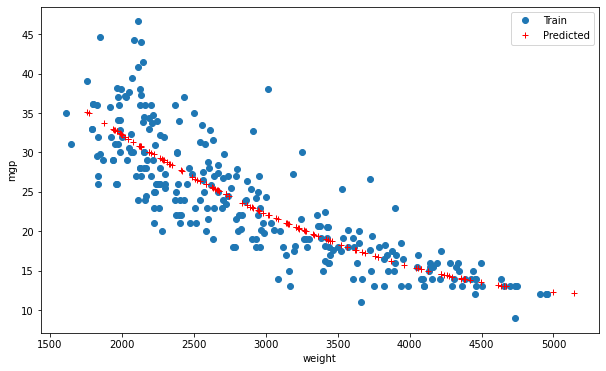

In [79]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = "Train")
ax.plot(X_test, y_hat_test, 'r+', label = "Predicted")
ax.legend(loc = "best") # 범례
plt.xlabel("weight")
plt.ylabel("mgp")
plt.show()

In [80]:
X_poly = poly.fit_transform(X)
y_hat = plr.predict(X_poly)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


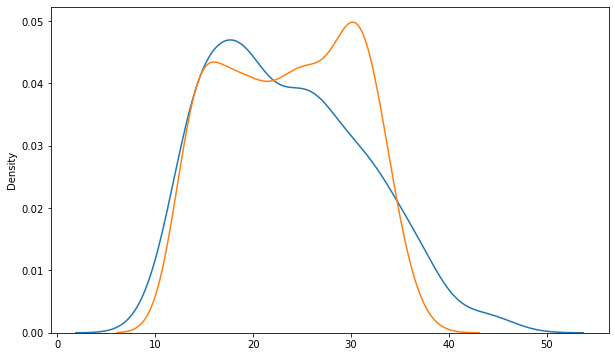

In [81]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(y, hist = False, label = "y")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()

In [85]:
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]
X = ndf[["cylinders", "horsepower", "weight"]]  # x1, x2, x3
y = df[["mpg"]]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
r_square = lr.score(X_test, y_test)
r_square

0.7178235636404087

In [91]:
lr.coef_

array([[-0.11503051, -0.04750803, -0.00566326]])

In [92]:
lr.intercept_

array([45.71385033])

In [94]:
y_hat = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


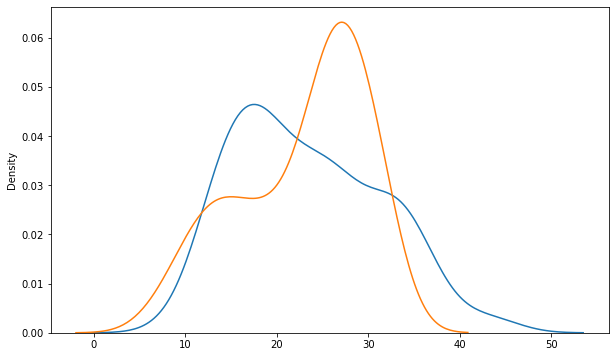

In [95]:
plt.figure(figsize = (10, 6))
ax1 = sns.distplot(y_test, hist = False, label = "y_test")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
# ax = ax1 : 같이 그린다는거임
plt.show()

In [123]:
# p308
# 분류문제임!

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,...,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,...,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,...,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,...,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,...,False,C,Southampton,yes,False
4,0,3,male,35.0,0,...,True,NaN,Southampton,no,True


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [125]:
rdf = df.drop(["deck", "embark_town"], axis = 1)
rdf.head()

,survived,pclass,sex,age,sibsp,...,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,...,Third,man,True,no,False
1,1,1,female,38.0,1,...,First,woman,False,yes,False
2,1,3,female,26.0,0,...,Third,woman,False,yes,True
3,1,1,female,35.0,1,...,First,woman,False,yes,False
4,0,3,male,35.0,0,...,Third,man,True,no,True


In [126]:
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [127]:
rdf.dropna(subset = ["age"], how = "any", axis = 0, inplace = True)
# any. 하나라도 있으면,

len(rdf)

714

In [128]:
rdf.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [129]:
# 범주형 데이터의 결측치를 보강하는 방법 > 최빈도 값으로 대체

most_freq = rdf["embarked"].value_counts(dropna = True).idxmax()
# 가장 많이 나온 인덱스 출력
most_freq
# 최빈도 값이 아니라, 각각 값이 나온 비율로 랜덤으로 대체 하면 안되는걸까?

'S'

In [130]:
rdf.describe(include = "all")

,survived,pclass,sex,age,sibsp,...,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,...,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,...,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,...,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,...,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,...,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,...,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,...,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,...,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN


In [131]:
rdf["embarked"].fillna(most_freq, inplace = True)

In [132]:
ndf = rdf[["survived", "pclass", "sex", "age", "sibsp", "parch", "embarked"]]
# sibling spous? 스파우스
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [134]:
# one-hot incoding
# cv, nlp 등에서 사용하지만, nlp에서 가장 많이 사용
# 해당되는걸 1로 찍고, 아닌건 0으로 채움
# 0이 너무 많아서 1인 부분이 나타날 확률이 너무 적어짐. 그래서 구글이 만든게 워드 투 백.
# 워드 투 백? 워드임베딩의 시작임
# 한글어 표준. 어쩌구. 홍콩과기대. 네이버. 찾아보자

# 더미 변수화
onehot_sex = pd.get_dummies(ndf["sex"])
# 남자가 1이면 여성은 0이 됨.
# 범주형을 숫자형 데이터로 바꿔버림

# 새로 옆에 붙여줌
ndf = pd.concat([ndf, onehot_sex], axis = 1)

onehot_embarked = pd.get_dummies(ndf["embarked"])
ndf = pd.concat([ndf, onehot_embarked], axis = 1)

In [135]:
ndf.drop(["sex", "embarked"], axis = 1, inplace = True)
ndf.head()

,survived,pclass,age,sibsp,parch,...,female,male,C,Q,S
0,0,3,22.0,1,0,...,0,1,0,0,1
1,1,1,38.0,1,0,...,1,0,1,0,0
2,1,3,26.0,0,0,...,1,0,0,0,1
3,1,1,35.0,1,0,...,1,0,0,0,1
4,0,3,35.0,0,0,...,0,1,0,0,1


In [139]:
X = ndf[["pclass", "age", "sibsp", "parch", "female", "male", "C", "Q", "S"]]
y = ndf["survived"]

In [141]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)  
# StandardScaler : 표준 정규화. 0과 1로
# 왜? onehot 인코딩을 시켰기 때문에 더함. 
# age의 단위가 다르기 때문에 스케일을 맞춰줘야하기 때문임

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [145]:
print(X_train.shape)
print(y_train.shape)

(499, 11)
(499,)


In [146]:
X_test.shape

(215, 11)

In [147]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
# k = 5로 설정. 하이퍼파라미터를 조절한것.

In [149]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
y_hat = knn.predict(X_test)

In [152]:
y_hat[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [153]:
y_test.values[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [156]:
from sklearn import metrics
knn_met = metrics.confusion_matrix(y_test, y_hat)
# 평가지표
knn_met

array([[113,  11],
       [ 22,  69]], dtype=int64)

In [159]:
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)
# precision : 정밀도임. 정확도 아님. 책 수정할것.
# accuracy 많이봄. f1 score도 많이봄


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       124
           1       0.86      0.76      0.81        91

    accuracy                           0.85       215
   macro avg       0.85      0.83      0.84       215
weighted avg       0.85      0.85      0.84       215



## 서포트 벡터 머신

In [160]:
# import 

import pandas as pd
import numpy as np
import seaborn as sns

In [161]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리 (EDA / Preprocessing)
원하는 속성값을 추출하기위함
row(레코드)가 적은 데이터는 함부로 제거하지 않는게 좋음.
underfitting이 발생할 우려가 있기 때문
때문에 빈 값(null)은 수치형에서는 min, median으로 대체하고,
factor형은 주로 최빈값으로 대체함
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
머신러닝은 연구자의 역량이 굉장히 중요함. 어떤 속성을 추출할건지?
비즈니스 도메인을 잘 알아야함.
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town') # prefix : 전치사. 앞에 붙여줌. e.g. town_S
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
# 나중에 딥러닝 파트에서 batch 정규화가 나올것임
# 같은 묶음단위로 정규화하는것

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (499, 9)
test data 개수:  (215, 9)




In [162]:
from sklearn import svm
# 서포트 벡터 머신

svm_model = svm.SVC(kernel = "rbf")
# 커널의 rbf를 사용한다.
# 왜? 논문봐야함ㅇㅇ

In [163]:
svm_model.fit(X_train, y_train)
# 모형 학습

SVC()

In [167]:
y_hat = svm_model.predict(X_test)
# 테스트 검증, 예측
y_hat[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [169]:
y_test.values[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [171]:
from sklearn import metrics

svm_mat = metrics.confusion_matrix(y_test, y_hat)
print(svm_mat)

[[120   5]
 [ 35  55]]


In [172]:
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## 분류

In [173]:
# decision tree
# 의사결정 트리
# 이산수학. yes or no

# import 


In [174]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

In [175]:
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

In [176]:
pd.set_option('display.max_columns', 15)

In [177]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [179]:
df.describe(include = "all")

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [180]:
df["bare_nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [183]:
df["bare_nuclei"].replace("?", np.nan, inplace = True)

In [185]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [187]:
df.dropna(subset = ["bare_nuclei"], axis = 0, inplace = True)

In [188]:
df["bare_nuclei"] = df["bare_nuclei"].astype("int")

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int32
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [190]:
df.describe()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [194]:
# data set split

X = df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y = df['class']

In [199]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)

In [203]:
print(X_train.shape)
print(X_test.shape)

(478, 9)
(205, 9)


In [204]:
from sklearn import tree

t_model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5)

# entropy? 크로스 엔트로피 정의 확실히 알아보자

In [205]:
t_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [206]:
y_hat = t_model.predict(X_test)

In [209]:
y_hat[:10]

array([4, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [210]:
y_test.values[:10]

array([4, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

In [211]:
# 성능비교
from sklearn import metrics
t_mat = metrics.confusion_matrix(y_test, y_hat)
print(t_mat)

[[132   6]
 [  4  63]]


In [212]:
t_report = metrics.classification_report(y_test, y_hat)
print(t_report)

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       138
           4       0.91      0.94      0.93        67

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205



In [213]:
# 심심할때 tree_classification마지막에 함해보세요.  import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(20,15))
# _ = tree.plot_tree(tree_model, filled=True)


In [215]:
# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

In [216]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [219]:
X = df.iloc[:, :]
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [223]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [228]:
from sklearn import cluster
kmeans = cluster.KMeans(init = "k-means++", n_clusters = 5, n_init = 10)
# init 디폴트임.


In [232]:
kmeans.fit(X)
# 테스트 데이터를 나눌 수 없음. 비지도학습이라 이렇게 X를 통째로 학습한것
# 종속변수가 없음

KMeans(n_clusters=5)

In [236]:
kmeans.labels_
# 레이블들 뽑아냄
# 그룹을 0~4까지 5개로 나눈것임

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 4, 1, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 0, 1, 4, 1, 1, 0, 4,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 4, 4, 0,
       0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1,

In [237]:
cluster_label = kmeans.labels_

In [238]:
df["Cluster"] = cluster_label

In [239]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


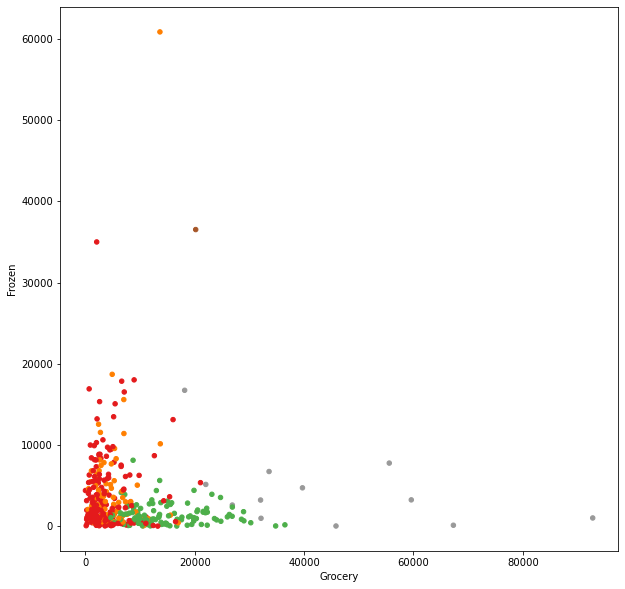

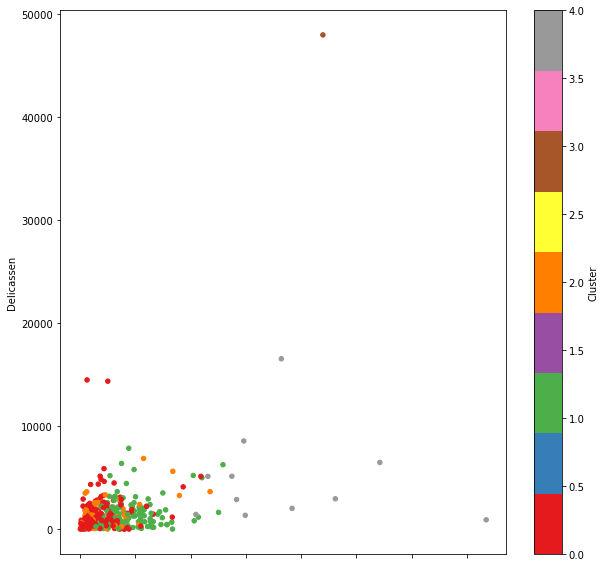

In [242]:
# 남은건 시각화지만 시간이 없으므로 패스. 알아서 해보기
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
# 산점도. 색은 cluster. 군집을 기준으로 나눔. cmap? 파레트인듯? colormap. legend임.? 뭐지
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

In [248]:
# 마스킹 기법
# 마스크를 제작했음. 아래있는게 마스크
mask = (df["Cluster"] == 0) | (df["Cluster"] == 4)
ndf = df[-mask]

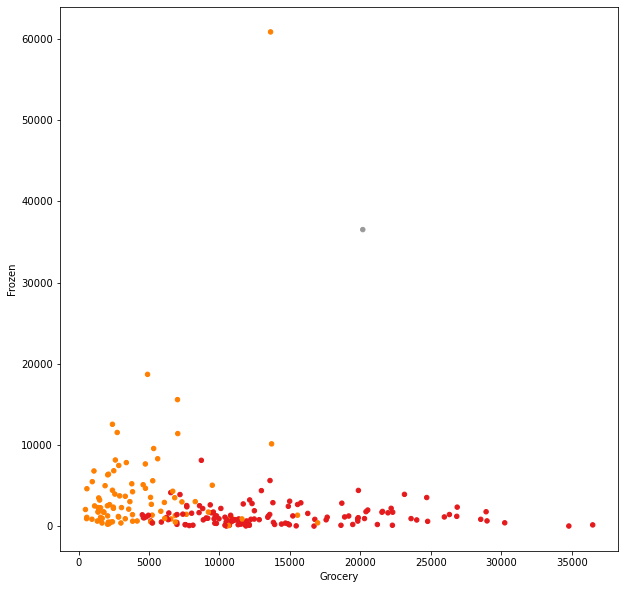

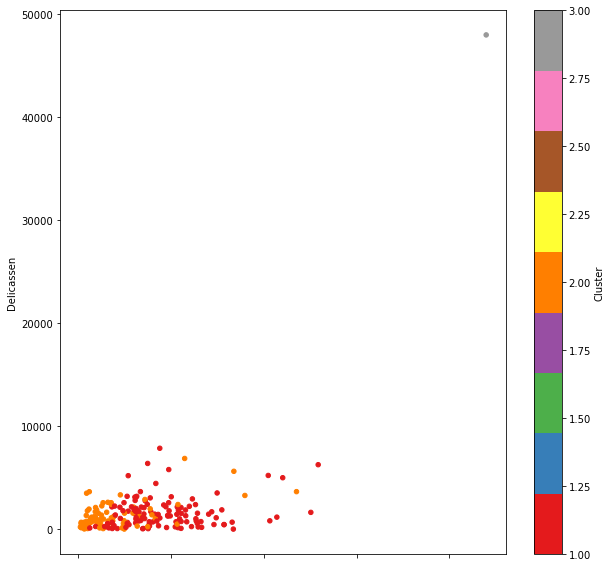

In [249]:
# 남은건 시각화지만 시간이 없으므로 패스. 알아서 해보기
# 그래프로 표현 - 시각화
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
# 산점도. 색은 cluster. 군집을 기준으로 나눔. cmap? 파레트인듯? colormap. legend임.? 뭐지
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

## DBSCAN

In [254]:
# 밀도 보고하는것. density를 기준으로 공간에 crossing 되어있는걸? ?

# !pip install folium
# 시각화 툴

import pandas as pd
import folium

In [257]:
# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

In [258]:
file_path = './2016_middle_shcool_graduates_report.xlsx'

In [262]:
df = pd.read_excel(file_path, header = 0)

In [263]:
df.columns.values

array(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학',
       '취업', '미상', '위도', '경도'], dtype=object)

In [264]:
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,...,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,...,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,...,0.010,0,0.000,37.510750,127.008900


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [266]:
df.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,...,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,...,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,...,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,...,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,...,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,...,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,...,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,...,1.000000,0.0,0.036000,37.694777,129.106974


In [267]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', # tiles 바꿀 수 있음
                        zoom_start=12)

In [268]:
mschool_map

In [297]:
for name, lat, lng in zip(df.학교명, df["위도"], df["경도"]):
    folium.CircleMarker([lat, lng], redius =5, color = "brown", 
                        fill = True, fill_Color = "coral", fill_opaciy = 0.7, 
                        popup = name, ).add_to(mschool_map)
mschool_map

In [298]:
mschool_map.save('./seoul_mschool_loc.html')

In [280]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
#  알아서 원핫인코딩 해주는거임
onehot_encoder = preprocessing.OneHotEncoder()

In [285]:
onehot_location = label_encoder.fit_transform(df["지역"])
onehot_code = label_encoder.fit_transform(df["코드"])
onehot_type = label_encoder.fit_transform(df["유형"])
onehot_day = label_encoder.fit_transform(df["주야"])

In [286]:
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,...,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,...,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,...,0.010,0,0.000,37.510750,127.008900


In [287]:
df["location"] = onehot_location
df["code"] = onehot_code
df["type"] = onehot_type
df["day"] = onehot_day

In [288]:
df

,Unnamed: 0,지역,학교명,코드,유형,...,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,127.038909,16,0,1,0
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,127.003857,22,0,1,0
2,2,강남구,개원중학교,3,공립,...,127.071744,0,0,0,0
3,3,강남구,개포중학교,3,공립,...,127.062201,0,0,0,0
4,4,서초구,경원중학교,3,공립,...,127.008900,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
410,410,강남구,국립국악중학교,9,국립,...,127.051355,0,2,1,0
411,411,금천구,국립전통예술중학교,9,국립,...,126.906424,7,2,1,0
412,412,광진구,선화예술학교,9,사립,...,127.087737,5,2,2,0
413,413,중구,예원학교,9,사립,...,126.971553,23,2,2,0


In [299]:
df.columns.values

array(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고',
       '특성화고', '과학고', '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학',
       '취업', '미상', '위도', '경도', 'location', 'code', 'type', 'day'],
      dtype=object)

In [302]:
# 분석에 사용할 속성 추출. 
# 과학고, 외고_국제고, 자사고만 추출
column_list = [10, 11, 14]
X = df.iloc[:, column_list]
print(X[:5])

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282


In [303]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [308]:
from sklearn import cluster
dbm = cluster.DBSCAN(eps = 0.2, min_samples = 5)
# epsilon. (r. radius)

In [309]:
dbm.fit(X)

DBSCAN(eps=0.2)

In [313]:
cluster_label = dbm.labels_

In [314]:
df["Cluster"] = cluster_label

In [316]:
df.head()

,Unnamed: 0,지역,학교명,코드,유형,...,location,code,type,day,Cluster
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,16,0,1,0,-1
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,22,0,1,0,-1
2,2,강남구,개원중학교,3,공립,...,0,0,0,0,-1
3,3,강남구,개포중학교,3,공립,...,0,0,0,0,-1
4,4,서초구,경원중학교,3,공립,...,14,0,0,0,-1


In [331]:
# 클러스터 값을 가지고 그룹핑. 그룹별로 출력
grouped_cols = [0, 1, 3] + column_list
grouped = df.groupby("Cluster")

In [334]:
for k, g in grouped:
    print("*key :", k)
    print("*num :", len(g))
    print(g.iloc[:, grouped_cols].head())

*key : -1
*num : 255
   Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
0           0  성북구     3   0.018        0.007   0.227
1           1  종로구     3   0.000        0.035   0.043
2           2  강남구     3   0.009        0.012   0.090
3           3  강남구     3   0.013        0.013   0.065
4           4  서초구     3   0.007        0.010   0.282
*key : 0
*num : 102
    Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
13          13  서초구     3     0.0        0.022   0.038
22          22  강남구     3     0.0        0.019   0.044
28          28  서초구     3     0.0        0.015   0.050
34          34  강남구     3     0.0        0.016   0.065
43          43  송파구     3     0.0        0.021   0.054
*key : 1
*num : 45
     Unnamed: 0      지역  코드  과학고  외고_국제고  자사고
46           46    강동구     3     0.0          0.0   0.044
103         103    양천구     3     0.0          0.0   0.006
118         118    구로구     3     0.0          0.0   0.012
126         126  영등포구     3     0.0          0.0   0.050
175         175    중랑구     3     

In [335]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}

In [339]:
cluster_map = folium.Map(location = [37.55, 126.98], tiles = "Stamen Terrain", zoom_start = 12)

In [340]:
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

In [341]:
cluster_map

In [345]:
# 분석에 사용할 속성 추출. 
# 과학고, 외고_국제고, 자사고만 추출
column_list2 = [10, 11, 14, 23]
X2 = df.iloc[:, column_list2]
print(X2[:5])

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


In [346]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps = 0.2,  min_samples= 5)
dbm2.fit(X2)
df["Cluster2"] = 

SyntaxError: invalid syntax (<ipython-input-346-7b80bfa7a514>, line 4)

In [347]:
# 사이값 채워넣어라~
cluster2_map

NameError: name 'cluster2_map' is not defined